<a href="https://colab.research.google.com/github/SAURAVTHAKUR12/practice/blob/master/stonkspredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


2.1.0


In [30]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-ubp64r6s
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-ubp64r6s
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp36-none-any.whl size=80383 sha256=de14df391da88e4f2a4beeb620f8350c85b146d8885c62c95e78603fa791c9c2
  Stored in directory: /tmp/pip-ephem-wheel-cache-74oaifcn/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import pandas as pd 


In [0]:
# Define a dictionary containing trade data 
data = {'dollar': [72,71,78,79,73,74,78,80,83,81,78,79,83,85,87,85], 
        'trade deficit(m$)': [100,98,102,102,94,98,103,110,112,109,106,105,100,94,89,105]} 
  
# Convert the dictionary into DataFrame 
df = pd.DataFrame(data) 

In [132]:
# Declare a list that is to be converted into a column 
stocks = [231,232,212,209,241,234,214,210,200,195,199,200,189,175,151,199] 
  
# Using 'Address' as the column name 
# and equating it to the list 
df['stocks'] = stocks 
  
# Observe the result 
df 

,dollar,trade deficit(m$),stocks
0,72,100,231
1,71,98,232
2,78,102,212
3,79,102,209
4,73,94,241
5,74,98,234
6,78,103,214
7,80,110,210
8,83,112,200
9,81,109,195


In [0]:
train_dataset = df.sample(frac=0.6,random_state=0)
test_dataset = df.drop(train_dataset.index)
# train_dataset = df[:8]
# test_dataset = df[8:]

In [0]:
train_labels = train_dataset.pop('dollar')
test_labels = test_dataset.pop('dollar')

In [0]:
# def norm(x):
#   return (x - train_stats['mean']) / train_stats['std']
# normed_train_data = norm(train_dataset)
# normed_test_data = norm(test_dataset)

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

In [138]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [139]:
example_batch = train_dataset
example_result = model.predict(example_batch)
example_result

array([[5.9601107],
       [5.150146 ],
       [4.379237 ],
       [4.275273 ],
       [3.9421332],
       [6.4064555],
       [5.1030455],
       [3.1838884],
       [4.507348 ],
       [4.807769 ]], dtype=float32)

In [140]:
EPOCHS = 3000

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:5618.6729,  mae:74.7000,  mse:5618.6729,  val_loss:5341.4756,  val_mae:73.0808,  val_mse:5341.4756,  
....................................................................................................
Epoch: 100, loss:745.8195,  mae:24.7564,  mse:745.8195,  val_loss:513.3818,  val_mae:22.6538,  val_mse:513.3818,  
....................................................................................................
Epoch: 200, loss:176.7068,  mae:10.6570,  mse:176.7068,  val_loss:2.4125,  val_mae:1.2182,  val_mse:2.4125,  
....................................................................................................
Epoch: 300, loss:133.0872,  mae:8.7751,  mse:133.0872,  val_loss:8.6088,  val_mae:2.8063,  val_mse:8.6088,  
....................................................................................................
Epoch: 400, loss:96.5957,  mae:7.2250,  mse:96.5957,  val_loss:18.9354,  val_mae:4.2891,  val_mse:18.9354,  
...................................

In [141]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
2995,41.247540,4.968670,41.247540,35.359894,5.946316,35.359894,2995
2996,41.245052,5.230709,41.245052,58.257057,7.632629,58.257057,2996
2997,41.242516,4.968359,41.242516,35.355507,5.945946,35.355507,2997
2998,41.239990,5.230468,41.239990,58.252747,7.632347,58.252747,2998
2999,41.237396,4.968038,41.237396,35.350433,5.945518,35.350433,2999


In [142]:
model.predict(test_dataset)

array([[73.06524 ],
       [76.7491  ],
       [72.33912 ],
       [82.55163 ],
       [79.445496],
       [82.804115]], dtype=float32)

In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [dollar]')

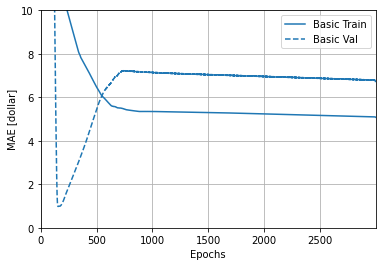

In [144]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [dollar]')

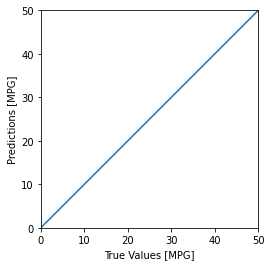

In [145]:
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

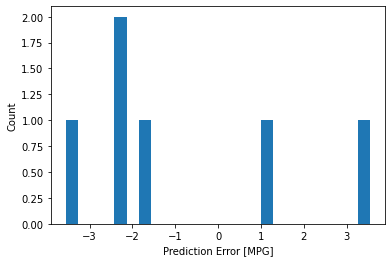

In [146]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [147]:
test_dataset

,trade deficit(m$),stocks
0,100,231
3,102,209
5,98,234
11,105,200
12,100,189
15,105,199


In [148]:
test_labels

0     72
3     79
5     74
11    79
12    83
15    85
Name: dollar, dtype: int64

In [149]:
test_predictions

array([73.06524 , 76.7491  , 72.33912 , 82.55163 , 79.445496, 82.804115],
      dtype=float32)